In [1]:
import numpy as np
import pandas as pd
import visuals as vs
import warnings
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

random_state = 6
np.random.seed(random_state)
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
%matplotlib inline
get_ipython().run_line_magic('matplotlib', 'inline')

# latex parameter
font = {
    'family': 'serif', 
    'serif': ['Computer Modern Roman'],
    'weight' : 'regular',
    'size'   : 18
    }

plt.rc('font', **font)
plt.rc('text', usetex=False)
# plt.style.use('classic')

color_map = 'viridis'

In [3]:
train_file = 'train.csv'
test_file = 'test.csv'
submission_file = 'sample_submission.csv'
df_train = pd.read_csv(train_file)
df_test = pd.read_csv(test_file)
submission = pd.read_csv(submission_file)

In [4]:
df_train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [5]:
df_test.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,...,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,...,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,...,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,...,4,0,0,4,0,1,1,0,0,1


### Check if both test and train have the same shape

In [6]:
print('Training data shape: {}'.format(df_train.shape))
print('Training data shape: {}'.format(df_test.shape))

Training data shape: (595212, 59)
Training data shape: (892816, 58)


### Check if there are any missing values

In [7]:
print('Is null on train: {}'.format(df_train.isnull().any().any()))
print('Is null on test: {}'.format(df_test.isnull().any().any()))

Is null on train: False
Is null on test: False


### Descriptive statistics

In [8]:
df_train.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Work with missing values

In [9]:
def get_missing_features():
    df_missings = pd.DataFrame([], columns=['Feature', 'No_recoreds', 'percent'])
    i= 0

    for f in df_train.columns:
        missings = df_train[df_train[f] == -1][f].count()
        if missings > 0:
            missings_perc = missings/df_train.shape[0]
            df_missings.loc[i] = [f, missings, missings_perc]
            i+=1
    df_missings = df_missings.sort_values('No_recoreds', ascending=False)
    return df_missings

### Tabular view of missing features

In [10]:
df_missings = get_missing_features()
display(df_missings)

,Feature,No_recoreds,percent
6,ps_car_03_cat,411231,0.690898
7,ps_car_05_cat,266551,0.447825
3,ps_reg_03,107772,0.181065
12,ps_car_14,42620,0.071605
8,ps_car_07_cat,11489,0.019302
2,ps_ind_05_cat,5809,0.009760
9,ps_car_09_cat,569,0.000956
0,ps_ind_02_cat,216,0.000363
4,ps_car_01_cat,107,0.000180
1,ps_ind_04_cat,83,0.000139


### Bar plot of missing features

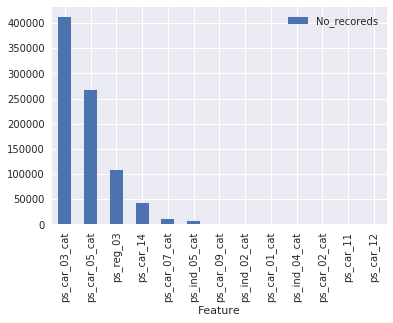

In [11]:
df_missings.plot(x='Feature', y='No_recoreds', kind='bar', )

### Drop features with most missing values

In [12]:
features_to_be_removed = 6
most_missings_features = list(df_missings['Feature'][0 : features_to_be_removed])
print('Features with most missing values: {}'.format(most_missings_features))
df_train.drop(most_missings_features, inplace=True, axis=1)
df_test.drop(most_missings_features, inplace=True, axis=1)

Features with most missing values: ['ps_car_03_cat', 'ps_car_05_cat', 'ps_reg_03', 'ps_car_14', 'ps_car_07_cat', 'ps_ind_05_cat']


### Treat reamining missing values by mean of the column

In [13]:
remain_features = list(df_missings['Feature'][features_to_be_removed:])
print('Remaining treatable features: {}'.format(remain_features))

for index, feature in enumerate(remain_features):
    col_mean = df_train[feature].mean()
    df_train[feature].replace([-1], col_mean, inplace = True)
    df_test[feature].replace([-1], col_mean, inplace = True)

Remaining treatable features: ['ps_car_09_cat', 'ps_ind_02_cat', 'ps_car_01_cat', 'ps_ind_04_cat', 'ps_car_02_cat', 'ps_car_11', 'ps_car_12']


### Check if there are any missing values

In [14]:
latest_missings = get_missing_features()
display(latest_missings)

,Feature,No_recoreds,percent


## Check category features of the dataset

In [15]:
cat_cols = [col for col in df_train.columns if '_cat' in col]
dummed_cols = []

for cat_col in cat_cols:
    unique_values = len(np.unique(df_train[cat_col]))
    if unique_values < 50:
        dummed_cols.append(cat_col)
    print('{} has {} unique values'.format(cat_col, unique_values))

ps_ind_02_cat has 5 unique values
ps_ind_04_cat has 3 unique values
ps_car_01_cat has 13 unique values
ps_car_02_cat has 3 unique values
ps_car_04_cat has 10 unique values
ps_car_06_cat has 18 unique values
ps_car_08_cat has 2 unique values
ps_car_09_cat has 6 unique values
ps_car_10_cat has 3 unique values
ps_car_11_cat has 104 unique values


In [16]:
print(dummed_cols)

['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat']


In [17]:
df_train_shape_before = df_train.shape
df_test_shape_before = df_test.shape

df_train = pd.get_dummies(df_train, columns = dummed_cols)
df_test = pd.get_dummies(df_test, columns = dummed_cols)

print('Train: before {}, after {}'.format(df_train_shape_before, df_train.shape))
print('Test: before {}, after {}'.format(df_test_shape_before, df_test.shape))

Train: before (595212, 53), after (595212, 107)
Test: before (892816, 52), after (892816, 106)


## Handle outliers

### 1. Detect outliers

In [31]:
from collections import Counter

def detect_outlier(df):
    features = df.columns
    outliers  = []
    for i, feature in enumerate(features):
        if df[feature].dtype == 'float64':
            # Calculate Q1 (25th percentile of the data) for the given feature
            Q1 = np.percentile(df[feature], 25)
            # Calculate Q3 (75th percentile of the data) for the given feature
            Q3 = np.percentile(df[feature], 75)
            # Use the interquartile range to calculate an outlier step
            step = 1.5 * (Q3 - Q1)
            feature_outliers = df[~((df[feature] >= Q1 - step) & (df[feature] <= Q3 + step))]
            outliers.extend(list(feature_outliers.index.values))
            print('Feature: {}, outliers: {}\n'.format(feature, len(feature_outliers.index)))
    
    multi_feature_outliers = (Counter(outliers) - Counter(set(outliers))).keys()
    return multi_feature_outliers

In [53]:
outliers  = detect_outlier(df_train.drop(['id', 'target'], axis = 1))

Feature: ps_reg_01, outliers: 0

Feature: ps_reg_02, outliers: 36793

Feature: ps_car_11, outliers: 25983

Feature: ps_car_12, outliers: 15355

Feature: ps_car_13, outliers: 26913

Feature: ps_car_15, outliers: 27409

Feature: ps_calc_01, outliers: 0

Feature: ps_calc_02, outliers: 0

Feature: ps_calc_03, outliers: 0



### 2. Remove outliers

In [50]:
good_data = df_train.drop(df_train.index[list(outliers)]).reset_index(drop = True)

print('Number of outliers occur more than one feature: {}'.format(len(outliers)))
print('Shape of old data: {}'.format(df_train.shape))
print('Shape of new data: {}'.format(good_data.shape))

Number of outliers occur more than one feature: 18593
Shape of old data: (595212, 107)
Shape of new data: (576619, 107)


## Handling imbalanced classes

### 0.1 Plot class ratio

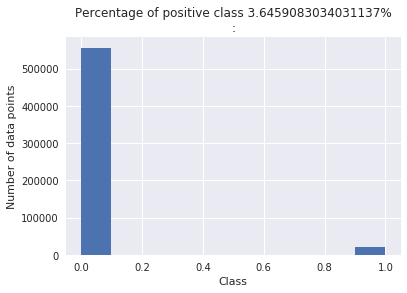

In [51]:
# Distribution of target variable
def plot_class_balace(df):    
    plt.hist(df['target'])
    plt.xlabel('Class')
    plt.ylabel('Number of data points')
    plt.title('Percentage of positive class {}%\n:'.format(len(df[df_train['target'] == 1].index)*100/df.shape[0]))
    plt.show()

plot_class_balace(good_data)

### 0.2 Upsampling positive class using the SMOTE algorithom

In [54]:
from imblearn.over_sampling import SMOTE 
from collections import Counter

df_train = good_data
sm = SMOTE(ratio = 0.30, random_state = random_state, k_neighbors=5)

X_im = df_train.drop(['id','target'], axis = 1)
Y_im = df_train['target']
print('Original dataset shape {}'.format(Counter(Y_im)))

X, Y = sm.fit_sample(X_im, Y_im)

print('Resampled dataset shape {}'.format(Counter(Y)))

Original dataset shape Counter({0: 556120, 1: 20499})
Resampled dataset shape Counter({0: 556120, 1: 166836})


## Feature scaling

In [48]:
X_train, Y_train = shuffle(X, Y, random_state = random_state)

# testing data
X = df_test.drop(['id'], axis = 1)
X_test = shuffle(X, random_state = random_state)

mms = StandardScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.fit_transform(X_test)

### Gini coeficient 

In [53]:
# from https://www.kaggle.com/mashavasilenko/
# porto-seguro-xgb-modeling-and-parameters-tuning

def gini(actual, pred, cmpcol = 0, sortcol = 1):
    assert( len(actual) == len(pred) )
    all = np.asarray(np.c_[ actual, pred, np.arange(len(actual)) ], dtype=np.float)
    all = all[ np.lexsort((all[:,2], -1*all[:,1])) ]
    totalLosses = all[:,0].sum()
    giniSum = all[:,0].cumsum().sum() / totalLosses
    
    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)

def gini_normalized(a, p):
    return gini(a, p) / gini(a, a)

def gini_xgb(preds, dtrain):
    labels = dtrain.get_label()
    gini_score = gini_normalized(labels, preds)
    return [('gini', gini_score)]

## Model building

In [54]:
model = RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=4, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=random_state, verbose=0, warm_start=False)

model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=4, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=6, verbose=0, warm_start=False)

In [52]:
pred = model.predict_proba(X_test)[:,1]
print( "Gini = ", eval_gini(Y_train, pred) )

NameError: name 'y_train' is not defined

In [ ]:
print('The accuracy of the model is {}'.format(accuracy_score(Y_test, Y_pred)))
print('Classification report \n {}'.format(classification_report(Y_test, Y_pred)))
print('Confusion matrix \n {}'.format(confusion_matrix(Y_pred, Y_test)))